# 机器学习

## 线性回归

E:\Anaconda\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


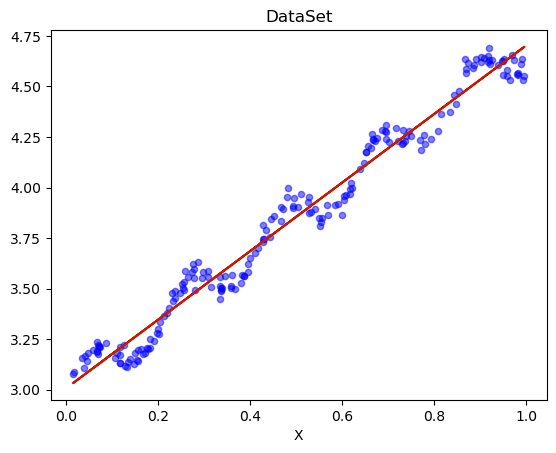

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    # 数据集中第一列1是x0，参与矩阵计算，有实际意义
    numFeat = len(open(fileName).readline().split('\t')) - 1   # open默认模式取r
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

def standRegres(xArr,yArr):
    """
    函数说明:计算回归系数w
    Parameters:
        xArr - x数据集
        yArr - y数据集
    Returns:
        ws - 回归系数
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T * xMat                            #根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:     # 求行列式
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T*yMat)         # 文中求导推出的公式  求出预测的最佳回归系数
    return ws

def plotDataSet():
    """
    函数说明:绘制数据集
    Parameters:
        无
    Returns:
        无
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    n = len(xArr)                                                        #数据个数
    xcord = []; ycord = []                                                #样本点
    for i in range(n):
        xcord.append(xArr[i][1]); ycord.append(yArr[i])                    #样本点
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord, ycord, s = 20, c = 'green',alpha = .5)                #绘制样本点
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('X')
    plt.show()

def plotRegression():
    """
    函数说明:绘制回归曲线和数据点
    Parameters:
        无
    Returns:
        无
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    xArr, yArr = loadDataSet('ex0.txt')   #加载数据集

    # 调库的线性回归
    reg = linear_model.LinearRegression()
    xMat = np.mat(xArr)[:, 1]
    reg.fit(xMat, yArr)
    xCopy = xMat.copy()
    yHat = reg.coef_ * xCopy.T + reg.intercept_
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.plot(xCopy, yHat.T, c = 'green')

    # 手动实现的线性回归  （红线）
    ws = standRegres(xArr, yArr)                                        #计算回归系数
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    xCopy = xMat.copy()                                                    #深拷贝xMat矩阵
    xCopy.sort(0)                                                        #排序
    yHat = xCopy * ws                                                     #计算对应的y值
    ax.plot(xCopy[:, 1], yHat, c = 'red')                                #绘制回归曲线
    ax.scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('X')
    plt.show()

if __name__ == '__main__':
    plotRegression()